In [9]:
%load_ext autoreload
%autoreload 2

In [26]:
from toss.visualization.plotting_utility import plot_performance_scaling
import numpy as np

# For Plotting
import matplotlib.pyplot as plt
from matplotlib.patches import Circle
from mpl_toolkits.mplot3d import Axes3D
import pyvista as pv

[ 54.45194149  50.85636258  62.9845922   57.97983265  56.36378407
  71.28957367  74.47319651 101.2276597  145.69164801]
(9,)
(9,)


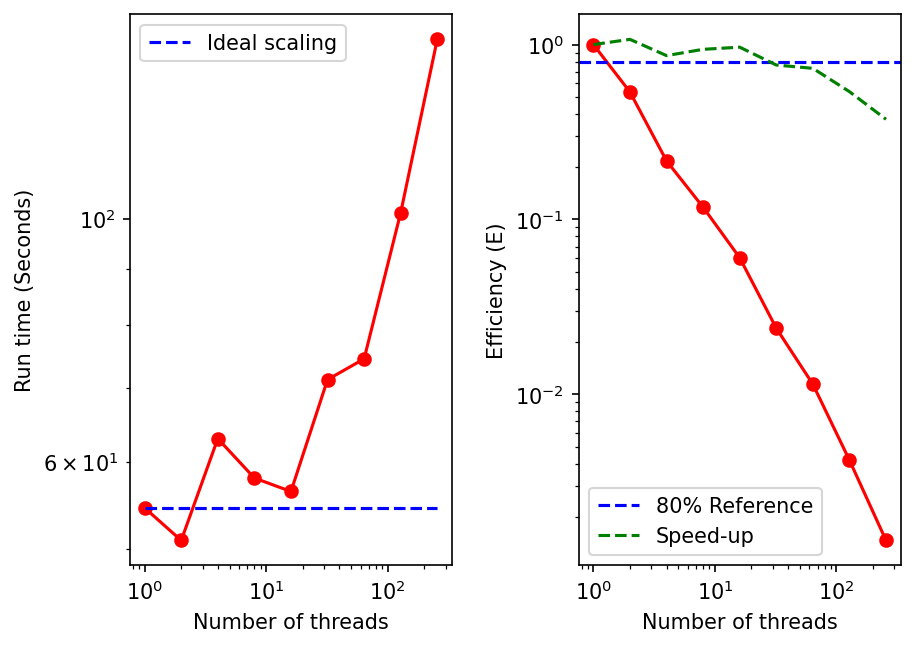

In [87]:
threads = np.array([1, 2, 4, 8, 16, 32, 64, 128, 256])
run_times = np.genfromtxt('new_weak_scaling__1S_1M_12H.csv', delimiter=',')[13,:]
print(run_times)
print(threads.shape)
print(run_times.shape)
plot_performance_scaling(threads, run_times)

[784.73256946 369.8513937  209.57555175  92.64548969  54.36705923
  32.46294165  17.80600548  11.11656666  12.99780941]
(9,)
(9,)


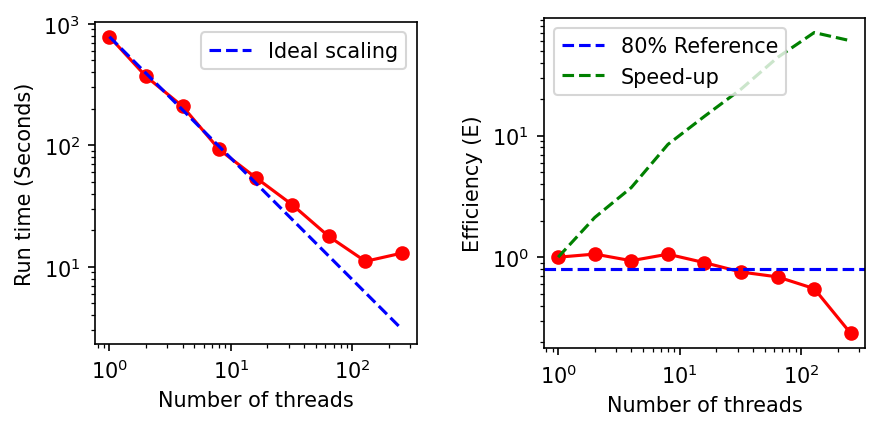

In [47]:
threads = np.array([1, 2, 4, 8, 16, 32, 64, 128, 256])
run_times = np.genfromtxt('strong_scaling_small_run__1S_1M_12H.csv', delimiter=',')[13,:]
print(run_times)
print(threads.shape)
print(run_times.shape)
plot_performance_scaling(threads, run_times)

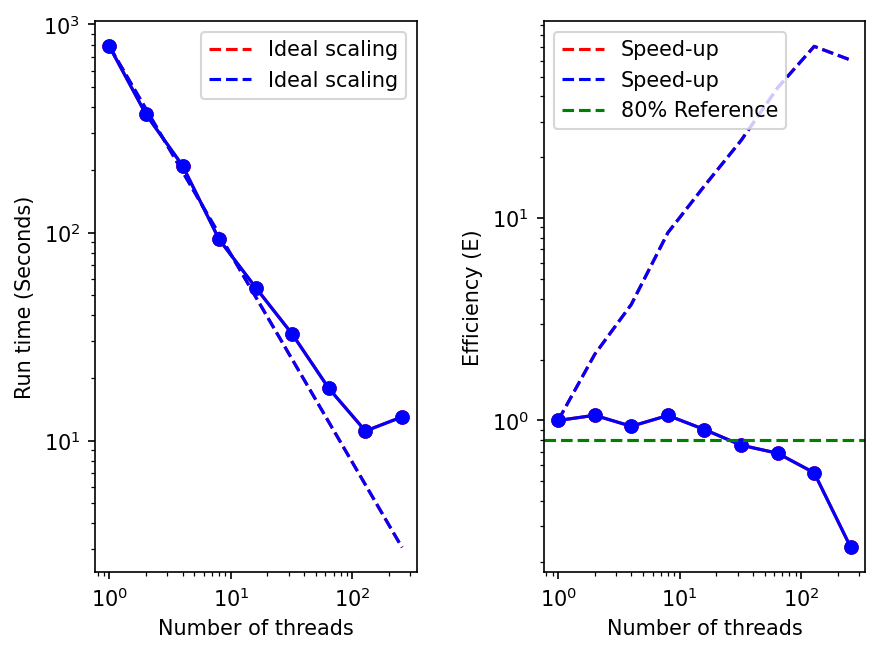

In [27]:
threads = np.array([1, 2, 4, 8, 16, 32, 64, 128, 256])
run_times_small = np.genfromtxt('strong_scaling_small_run__1S_1M_12H.csv', delimiter=',')[13,:]
run_times_large = np.genfromtxt('new_strong_scaling_large_run__1S_1M_12H.csv', delimiter=',')[13,:]


# Setting up figure
figure, (ax1, ax2) = plt.subplots(1,2)
figure.tight_layout(pad=3)
figure.figsize = (5,10) 
figure.dpi=150

for i in [0,1]:
    if i == 0:
        run_times = run_times_small
        color = "r"
    elif i == 1:
        run_times = run_times_small
        color = "b"
        
    # Define ideal scaling:
    lowest_core_count = threads[0]
    measured_time_lowest_core_count = run_times[0]
    ideal_time_n_cores=[]
    speed_up = []
    for i in range(0,len(threads)):
        n_cores = threads[i]
        ideal_time_n_cores.append((measured_time_lowest_core_count * lowest_core_count)/n_cores)
        speed_up.append(measured_time_lowest_core_count/run_times[i])

    # Plotting: run time vs core count (alongside corresponding ideal scaling)
    ax1.plot(threads, run_times, 'o-'+color) #, label="10 Pop/Island"
    ax1.plot(threads, ideal_time_n_cores, "--"+color, label="Ideal scaling")


    # Plotting: efficiency vs core count (and a reference line representing 80%)
    efficiency = []
    for j in range(0,len(threads)):
        efficiency.append(ideal_time_n_cores[j]/run_times[j])
    ax2.plot(threads, efficiency, 'o-'+color) #, label="10 Pop/Island"
    ax2.plot(threads, speed_up, "--"+color, label="Speed-up")




ax1.legend(loc='upper right', fontsize=10)
ax1.set_xlabel("Number of threads")
ax1.set_ylabel("Run time (Seconds)") 
ax1.set_xscale("log")
ax1.set_yscale("log")

ax2.axhline(y=0.8, color="g", linestyle="--", label="80% Reference")
ax2.legend(loc='upper left', fontsize=10)
ax2.set_xlabel("Number of threads")
ax2.set_ylabel("Efficiency (E)")
ax2.set_xscale("log")
ax2.set_yscale("log")